In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
from input_parser import InputParser
from abstract_simulator import AbstractMachineSimulator
from abstract_grapher import graph_abstract_machine

In [105]:
parser = InputParser("""

// This is a comment.

// Data section
.DATA

STACK q0
QUEUE q1
TAPE T2

// Logic section
.LOGIC

// State Transitions
q0] SCAN (0,q0), (1,q1), (1,accept)
q1] SCAN (0,q0), (1,q2)
q2] SCAN (0,q0), (1,q1), (1,accept)

""")

In [106]:
parsed = parser.parse()
parsed

{'aux_data': {'q0': {'type': 'STACK'},
  'q1': {'type': 'QUEUE'},
  'T2': {'type': 'TAPE'}},
 'logic': {'q0': {'instruction': 'SCAN',
   'arguments': ['(0,q0)', '(1,q1)', '(1,accept)']},
  'q1': {'instruction': 'SCAN', 'arguments': ['(0,q0)', '(1,q2)']},
  'q2': {'instruction': 'SCAN',
   'arguments': ['(0,q0)', '(1,q1)', '(1,accept)']}}}

In [122]:
simulator = AbstractMachineSimulator(parsed)
simulator.state_map

{'q0': {'instruction': 'SCAN',
  'associated_data': None,
  'transitions': {'0': 'q0', '1': 'accept'}},
 'q1': {'instruction': 'SCAN',
  'associated_data': None,
  'transitions': {'0': 'q0', '1': 'q2'}},
 'q2': {'instruction': 'SCAN',
  'associated_data': None,
  'transitions': {'0': 'q0', '1': 'accept'}}}

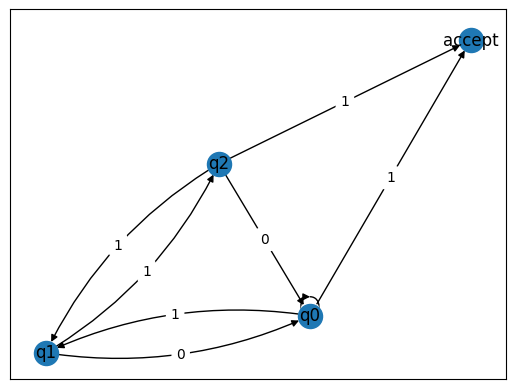

In [108]:
graph_abstract_machine(parsed['logic'])

In [144]:
input_tape = "#1#"
simulator.set_input_tape(input_tape)
simulator.input_tape.__str__()


'[#]1#'

In [143]:
simulator.step(verbose=True)
str(simulator.input_tape)

Read symbol #


'#1[#]'